<a href="https://colab.research.google.com/github/carolinehagood/covid-project/blob/main/Final_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cross-correlation function (CCF)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Total_cleaned_data.csv')
df.tail()

,Unnamed: 0,Week,Day,Start_Date,End_Date,Total_Doses,Year,COVID-19 Deaths
118,121,14,2022-04-16,2022-04-10,2022-04-16,333375,2020,16347.0
119,122,15,2022-04-23,2022-04-17,2022-04-23,359286,2020,17221.0
120,123,16,2022-04-30,2022-04-24,2022-04-30,461086,2020,15557.0
121,124,17,2022-05-07,2022-05-01,2022-05-07,609559,2020,13223.0
122,125,18,2022-05-14,2022-05-08,2022-05-14,203016,2020,11243.0


In [2]:
del df['Unnamed: 0']
print(df)

     Week         Day  Start_Date    End_Date  Total_Doses  Year  \
0       1  2020-01-11  2020-01-05  2020-01-11      3136353  2020   
1       2  2020-01-18  2020-01-12  2020-01-18      5371448  2020   
2       3  2020-01-25  2020-01-19  2020-01-25      6999168  2020   
3       4  2020-02-01  2020-01-26  2020-02-01      8741069  2020   
4       5  2020-02-08  2020-02-02  2020-02-08      9450425  2020   
..    ...         ...         ...         ...          ...   ...   
118    14  2022-04-16  2022-04-10  2022-04-16       333375  2020   
119    15  2022-04-23  2022-04-17  2022-04-23       359286  2020   
120    16  2022-04-30  2022-04-24  2022-04-30       461086  2020   
121    17  2022-05-07  2022-05-01  2022-05-07       609559  2020   
122    18  2022-05-14  2022-05-08  2022-05-14       203016  2020   

     COVID-19 Deaths  
0                1.0  
1                2.0  
2                3.0  
3                0.0  
4                4.0  
..               ...  
118          16347.0  

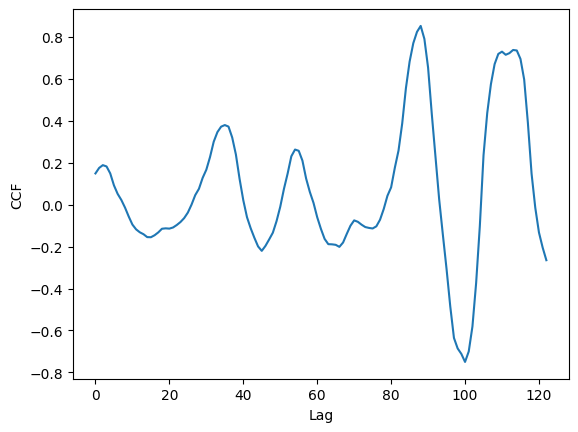

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

# Calculate the cross-correlation function (CCF)
ccf_result = ccf(df['COVID-19 Deaths'], df['Total_Doses'])

# Plot the CCF
plt.plot(ccf_result)
plt.xlabel('Lag')
plt.ylabel('CCF')
plt.show()

# Highest peak is lag to use. Positive lag ~80. Negative lag 100

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient and p-value
x = df['Total_Doses']
y = df['COVID-19 Deaths']
corr_coefficient, p_value = pearsonr(x, y)

print(f"Pearson's correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")


Pearson's correlation coefficient: 0.14862483483585176
P-value: 0.1008754229893672


In [7]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

#Calculating Granger Causality
x = df['Total_Doses']
y = df['COVID-19 Deaths']
data = pd.DataFrame({'x': x, 'y': y})

max_lag = 5
grangercausalitytests(data, max_lag)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3314  , p=0.0705  , df_denom=119, df_num=1
ssr based chi2 test:   chi2=3.4154  , p=0.0646  , df=1
likelihood ratio test: chi2=3.3684  , p=0.0665  , df=1
parameter F test:         F=3.3314  , p=0.0705  , df_denom=119, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.5168  , p=0.0129  , df_denom=116, df_num=2
ssr based chi2 test:   chi2=9.4229  , p=0.0090  , df=2
likelihood ratio test: chi2=9.0740  , p=0.0107  , df=2
parameter F test:         F=4.5168  , p=0.0129  , df_denom=116, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9372  , p=0.0364  , df_denom=113, df_num=3
ssr based chi2 test:   chi2=9.3573  , p=0.0249  , df=3
likelihood ratio test: chi2=9.0104  , p=0.0292  , df=3
parameter F test:         F=2.9372  , p=0.0364  , df_denom=113, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9222  , p=0.1118  

{1: ({'ssr_ftest': (3.3313734966865454, 0.07047804825456765, 119.0, 1),
   'ssr_chi2test': (3.4153577024853656, 0.06459241357617426, 1),
   'lrtest': (3.3684255733928694, 0.06645723764227732, 1),
   'params_ftest': (3.3313734966865782, 0.0704780482545662, 119.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (4.516778277400474, 0.012912830736037776, 116.0, 2),
   'ssr_chi2test': (9.422933992507884, 0.008991577292211035, 2),
   'lrtest': (9.07402747549986, 0.010705327783453155, 2),
   'params_ftest': (4.516778277400456, 0.012912830736038045, 116.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.9371561713786973, 0.03637042973050833, 113.0, 3),
   'ssr_chi2test': (9.35731169642771, 0.02489879080683978, 3),
   'lrtest': (9.010402884403447, 0.029152893780949297, 3),
   'params_ftest': (2.937156171378693, 0.036370429730508545, 113.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 